<a href="https://colab.research.google.com/github/NehaBhatia103/DataScienceAssignments/blob/main/Assignment_NN_GasTurbines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving gas_turbines.csv to gas_turbines.csv


In [ ]:
df=pd.read_csv("gas_turbines.csv")
df.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
df.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


Checking outliers

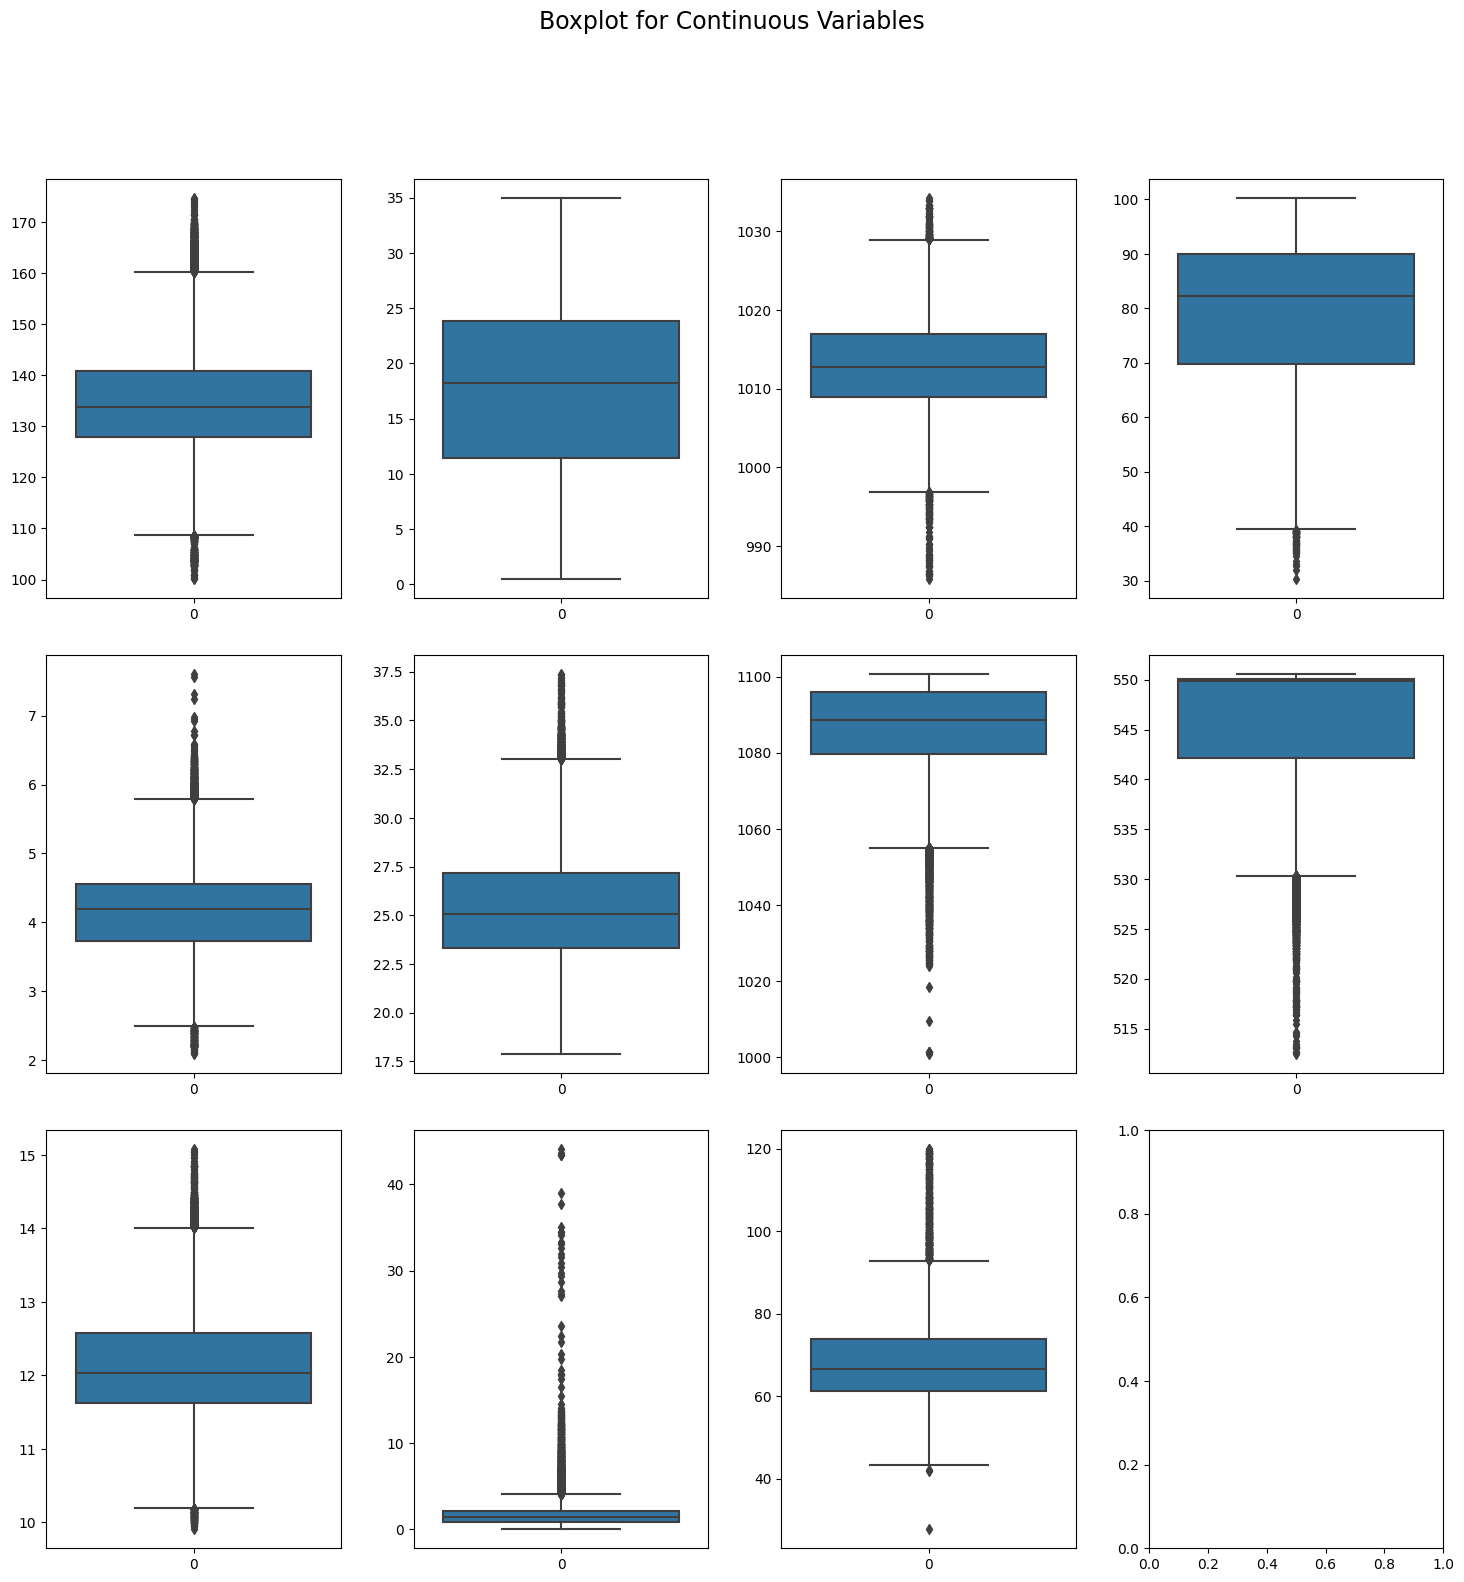

In [ ]:
fig, ax=plt.subplots(3,4, figsize=(15,15), sharex= False, sharey = False)
sns.boxplot(df.TEY, ax=ax[0,0])
sns.boxplot(df.AT, ax=ax[0,1])
sns.boxplot(df.AP, ax=ax[0,2])
sns.boxplot(df.AH, ax=ax[0,3])
sns.boxplot(df.AFDP, ax=ax[1,0])
sns.boxplot(df.GTEP, ax=ax[1,1])
sns.boxplot(df.TIT, ax=ax[1,2])
sns.boxplot(df.TAT, ax=ax[1,3])
sns.boxplot(df.CDP, ax=ax[2,0])
sns.boxplot(df.CO, ax=ax[2,1])
sns.boxplot(df.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

from the above plots we can not clearly specify which column to drop as the no of  uotliers is random.

##Pre Processing

In [ ]:
from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()

In [ ]:
column_names=df.columns
column_names

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [ ]:
norm_df=pd.DataFrame(norm.fit_transform(df),columns=column_names)
norm_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


In [ ]:
std_df=pd.DataFrame(Scaler.fit_transform(df),columns=column_names)
std_df

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.231172,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.229909,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.230541,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.229909,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.229909,-1.350985,0.574179,1.348591
...,...,...,...,...,...,...,...,...,...,...,...
15034,-1.153182,-1.185428,1.401860,-0.865850,-1.498657,-2.063184,0.103453,-1.426381,-1.543161,1.145792,1.085751
15035,-1.303986,-1.138630,1.447753,-0.913470,-1.438759,-2.268905,-0.276638,-1.415642,-1.513247,1.293578,1.119943
15036,-1.386267,-1.076233,1.476971,-0.951488,-1.410967,-2.789257,-1.026650,-1.516089,-1.467922,2.695925,2.170062
15037,-1.420423,-0.998236,1.441590,-0.988848,-1.447624,-2.456474,-0.528337,-1.481343,-1.422598,1.924683,2.391165


In [ ]:
x=std_df.drop("TEY",axis=1)
x.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,-1.439778,-0.826644,1.281436,-0.921232,-1.379101,-1.488376,0.585240,-1.357331,0.532012,1.387845
1,-1.449601,-0.748647,1.304564,-0.921495,-1.363528,-1.482325,0.585240,-1.363676,0.568733,1.393002
2,-1.434721,-0.686250,1.219086,-0.944385,-1.351309,-1.476275,0.568715,-1.360957,0.552938,1.363586
3,-1.413702,-0.623853,1.169060,-0.946884,-1.348194,-1.464173,0.583969,-1.356424,0.548933,1.382878
4,-1.368693,-0.545857,1.161883,-0.924389,-1.354663,-1.458123,0.582698,-1.350985,0.574179,1.348591


In [ ]:
y=std_df["TEY"]
y.head()

0   -1.231172
1   -1.229909
2   -1.230541
3   -1.229909
4   -1.229909
Name: TEY, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20)

Create a model

In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
#Creating model with 2 hidden layers
def create_model_2():
  model=Sequential()
  model.add(Dense(5,input_dim=10,kernel_initializer="uniform",activation='relu'))
  model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
  model.add(Dense(1))

  adam=Adam(lr=0.001)
  model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
  return model

In [ ]:
model1 = create_model_2()
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 6)                 36        
                                                                 
 dense_2 (Dense)             (None, 10)                70        
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 172 (688.00 Byte)
Trainable params: 172 (688.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))

    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model


In [ ]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

Here is the summary of the model2:
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                352       
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 11969 (46.75 KB)
Trainable params: 11969 (46.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________

In [ ]:
epochs=500
batch_size=50
model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

In [ ]:
model2.predict(x_test[:10]) # predicted values

1/1 [==============================] - 0s 145ms/step


array([[-0.0569438 ],
       [-0.01852658],
       [-1.4406093 ],
       [-0.02040678],
       [-0.0219315 ],
       [-0.04880396],
       [-1.3885354 ],
       [-0.01139212],
       [ 0.85478795],
       [-0.00516388]], dtype=float32)

In [ ]:
y_test[:10]    # actual values

8510    -0.095296
2386    -0.028331
11041   -1.480080
8750    -0.033385
11063   -0.023909
3071    -0.086452
11706   -1.415010
191     -0.018224
11760    0.812520
12837   -0.027700
Name: TEY, dtype: float64

In [ ]:
results= model2.evaluate(x_test, y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0231 - mape: 72.0920


Results of the model is good as the error is very less.

## Hyperparameter tuning
1. Batch size
2. epochs

In [ ]:
pip install scikeras

In [ ]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasRegressor
from keras.optimizers import Adam
from keras.layers import Dropout

In [ ]:
# Create the model
#get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)
# Define the grid search parameters
batch_size = [30,50,70]
epochs = [50,100,150]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=30, epochs=50....................................


[CV 1/5; 1/9] END .....batch_size=30, epochs=50;, score=0.998 total time=  50.3s
[CV 2/5; 1/9] START batch_size=30, epochs=50....................................


[CV 2/5; 1/9] END .....batch_size=30, epochs=50;, score=0.999 total time=  38.6s
[CV 3/5; 1/9] START batch_size=30, epochs=50....................................


[CV 3/5; 1/9] END .....batch_size=30, epochs=50;, score=0.999 total time=  39.0s
[CV 4/5; 1/9] START batch_size=30, epochs=50....................................


[CV 4/5; 1/9] END .....batch_size=30, epochs=50;, score=0.999 total time=  35.9s
[CV 5/5; 1/9] START batch_size=30, epochs=50....................................


[CV 5/5; 1/9] END .....batch_size=30, epochs=50;, score=0.999 total time=  38.6s
[CV 1/5; 2/9] START batch_size=30, epochs=100...................................


[CV 1/5; 2/9] END ....batch_size=30, epochs=100;, score=0.999 total time= 1.2min
[CV 2/5; 2/9] START batch_size=30, epochs=100...................................


[CV 2/5; 2/9] END ....batch_size=30, epochs=100;, score=0.999 total time= 1.2min
[CV 3/5; 2/9] START batch_size=30, epochs=100...................................


[CV 3/5; 2/9] END ....batch_size=30, epochs=100;, score=0.999 total time= 1.4min
[CV 4/5; 2/9] START batch_size=30, epochs=100...................................


[CV 4/5; 2/9] END ....batch_size=30, epochs=100;, score=0.998 total time= 1.4min
[CV 5/5; 2/9] START batch_size=30, epochs=100...................................


[CV 5/5; 2/9] END ....batch_size=30, epochs=100;, score=0.999 total time= 1.4min
[CV 1/5; 3/9] START batch_size=30, epochs=150...................................


[CV 1/5; 3/9] END ....batch_size=30, epochs=150;, score=0.998 total time= 1.8min
[CV 2/5; 3/9] START batch_size=30, epochs=150...................................


[CV 2/5; 3/9] END ....batch_size=30, epochs=150;, score=0.999 total time= 2.4min
[CV 3/5; 3/9] START batch_size=30, epochs=150...................................


[CV 3/5; 3/9] END ....batch_size=30, epochs=150;, score=0.999 total time= 2.4min
[CV 4/5; 3/9] START batch_size=30, epochs=150...................................


[CV 4/5; 3/9] END ....batch_size=30, epochs=150;, score=0.999 total time= 2.4min
[CV 5/5; 3/9] START batch_size=30, epochs=150...................................


[CV 5/5; 3/9] END ....batch_size=30, epochs=150;, score=0.999 total time= 1.8min
[CV 1/5; 4/9] START batch_size=50, epochs=50....................................


[CV 1/5; 4/9] END .....batch_size=50, epochs=50;, score=0.999 total time=  42.5s
[CV 2/5; 4/9] START batch_size=50, epochs=50....................................


[CV 2/5; 4/9] END .....batch_size=50, epochs=50;, score=0.999 total time=  43.4s
[CV 3/5; 4/9] START batch_size=50, epochs=50....................................


[CV 3/5; 4/9] END .....batch_size=50, epochs=50;, score=0.999 total time=  42.5s
[CV 4/5; 4/9] START batch_size=50, epochs=50....................................


[CV 4/5; 4/9] END .....batch_size=50, epochs=50;, score=0.999 total time=  42.6s
[CV 5/5; 4/9] START batch_size=50, epochs=50....................................


[CV 5/5; 4/9] END .....batch_size=50, epochs=50;, score=0.999 total time=  42.4s
[CV 1/5; 5/9] START batch_size=50, epochs=100...................................


[CV 1/5; 5/9] END ....batch_size=50, epochs=100;, score=0.999 total time= 1.4min
[CV 2/5; 5/9] START batch_size=50, epochs=100...................................


[CV 2/5; 5/9] END ....batch_size=50, epochs=100;, score=0.998 total time= 1.4min
[CV 3/5; 5/9] START batch_size=50, epochs=100...................................


[CV 3/5; 5/9] END ....batch_size=50, epochs=100;, score=0.999 total time= 1.4min
[CV 4/5; 5/9] START batch_size=50, epochs=100...................................


[CV 4/5; 5/9] END ....batch_size=50, epochs=100;, score=0.999 total time= 1.4min
[CV 5/5; 5/9] START batch_size=50, epochs=100...................................


[CV 5/5; 5/9] END ....batch_size=50, epochs=100;, score=0.999 total time=  47.6s
[CV 1/5; 6/9] START batch_size=50, epochs=150...................................


[CV 1/5; 6/9] END ....batch_size=50, epochs=150;, score=0.999 total time= 1.1min
[CV 2/5; 6/9] START batch_size=50, epochs=150...................................


[CV 2/5; 6/9] END ....batch_size=50, epochs=150;, score=0.999 total time= 1.4min
[CV 3/5; 6/9] START batch_size=50, epochs=150...................................


[CV 3/5; 6/9] END ....batch_size=50, epochs=150;, score=0.999 total time= 1.1min
[CV 4/5; 6/9] START batch_size=50, epochs=150...................................


[CV 4/5; 6/9] END ....batch_size=50, epochs=150;, score=0.999 total time= 1.4min
[CV 5/5; 6/9] START batch_size=50, epochs=150...................................


[CV 5/5; 6/9] END ....batch_size=50, epochs=150;, score=0.999 total time= 1.1min
[CV 1/5; 7/9] START batch_size=70, epochs=50....................................


[CV 1/5; 7/9] END .....batch_size=70, epochs=50;, score=0.998 total time=  22.0s
[CV 2/5; 7/9] START batch_size=70, epochs=50....................................


[CV 2/5; 7/9] END .....batch_size=70, epochs=50;, score=0.998 total time=  22.0s
[CV 3/5; 7/9] START batch_size=70, epochs=50....................................


[CV 3/5; 7/9] END .....batch_size=70, epochs=50;, score=0.999 total time=  23.5s
[CV 4/5; 7/9] START batch_size=70, epochs=50....................................


[CV 4/5; 7/9] END .....batch_size=70, epochs=50;, score=0.999 total time=  18.0s
[CV 5/5; 7/9] START batch_size=70, epochs=50....................................


[CV 5/5; 7/9] END .....batch_size=70, epochs=50;, score=0.998 total time=  19.1s
[CV 1/5; 8/9] START batch_size=70, epochs=100...................................


[CV 1/5; 8/9] END ....batch_size=70, epochs=100;, score=0.999 total time=  42.4s
[CV 2/5; 8/9] START batch_size=70, epochs=100...................................


[CV 2/5; 8/9] END ....batch_size=70, epochs=100;, score=0.999 total time=  34.4s
[CV 3/5; 8/9] START batch_size=70, epochs=100...................................


[CV 3/5; 8/9] END ....batch_size=70, epochs=100;, score=0.999 total time=  43.0s
[CV 4/5; 8/9] START batch_size=70, epochs=100...................................


[CV 4/5; 8/9] END ....batch_size=70, epochs=100;, score=0.999 total time=  43.0s
[CV 5/5; 8/9] START batch_size=70, epochs=100...................................


[CV 5/5; 8/9] END ....batch_size=70, epochs=100;, score=0.999 total time=  42.5s
[CV 1/5; 9/9] START batch_size=70, epochs=150...................................


[CV 1/5; 9/9] END ....batch_size=70, epochs=150;, score=0.999 total time= 1.4min
[CV 2/5; 9/9] START batch_size=70, epochs=150...................................


[CV 2/5; 9/9] END ....batch_size=70, epochs=150;, score=0.999 total time=  52.4s
[CV 3/5; 9/9] START batch_size=70, epochs=150...................................


[CV 3/5; 9/9] END ....batch_size=70, epochs=150;, score=0.999 total time= 1.4min
[CV 4/5; 9/9] START batch_size=70, epochs=150...................................


[CV 4/5; 9/9] END ....batch_size=70, epochs=150;, score=0.999 total time= 1.4min
[CV 5/5; 9/9] START batch_size=70, epochs=150...................................


[CV 5/5; 9/9] END ....batch_size=70, epochs=150;, score=0.999 total time= 1.4min


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9988723758650538, using {'batch_size': 50, 'epochs': 150}
0.9985977033940883,0.00030215813207921965 with: {'batch_size': 30, 'epochs': 50}
0.9986334426205039,0.0003687634225180152 with: {'batch_size': 30, 'epochs': 100}
0.9987822740353683,0.0001784387218515961 with: {'batch_size': 30, 'epochs': 150}
0.9986699962981307,0.00010564451508776195 with: {'batch_size': 50, 'epochs': 50}
0.9986596803181568,0.00020891878651684473 with: {'batch_size': 50, 'epochs': 100}
0.9988723758650538,3.641257974937109e-05 with: {'batch_size': 50, 'epochs': 150}
0.9983326434841624,0.00035814987740551043 with: {'batch_size': 70, 'epochs': 50}
0.9988073683116643,0.00012737387982555756 with: {'batch_size': 70, 'epochs': 100}
0.9987959590352837,0.00012410791978622842 with: {'batch_size': 70, 'epochs': 150}


In [ ]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model
%%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 10,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,learning_rate=0.001,dropout_rate=0.0,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

CPU times: user 1h 37min 42s, sys: 3min, total: 1h 40min 43s
Wall time: 1h 38min 57s


In [ ]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9989634289659921, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9989634289659921,5.8409369773052567e-05 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9989339720685038,9.078933896936789e-05 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.998787025368388,0.0001701632349816685 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9960069370745324,0.0010723958495373039 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9949846278193457,0.002011001849356941 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9962088444910405,0.0004914195906513474 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9929871638814547,0.0005680861788292553 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.993322979746748,0.0015425195657373812 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.994333715485951,0.0009324409227225534 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
